<a href="https://colab.research.google.com/github/mariaimr/Monografia-UdeA/blob/main/Monografia_Credit_Card_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

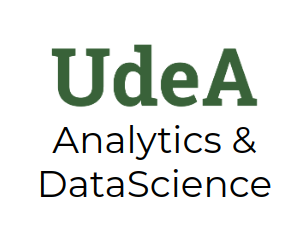

In [3]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

Image("local/imgs/udea-datascience.png")

**Materia:** Aprendizaje Automático I

**Departamento:** Especialización en Analítica y Ciencia de Datos - Posgrados en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

*   **Nombres Completos**: Maria Isabel Martínez Rendón
*   **Número de Cédula**: 1046912393


*   **Nombres Completos**: Santiago Felipe Rosales Guerrero
*   **Número de Cédula**: 1085334424

## Librerías y configuraciones previas


In [45]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
from sklearn.model_selection import train_test_split
import multiprocessing

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from scipy import special 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
import statsmodels.api as sm


#support vector machine
from sklearn.svm import SVR

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


# ==============================================================================
#mejores parametros
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
#para procesar atípicos
from sklearn.neighbors import LocalOutlierFactor # Algoritmo LOF

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
import os
drive.mount('/content/drive/')
#kaggle_monografia

Mounted at /content/drive/


##Funciones

In [7]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [8]:
# Función para contruir un modelo de regresión lineal por medio de statsmodels.api

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [9]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#Credit Card Approval Prediction


## 1. Descripción de la base de datos

**Contexto**

Las tarjetas de crédito son un método de control de riesgos habitual en el sector financiero. Utiliza la información personal y los datos presentados por los solicitantes de tarjetas de crédito para predecir la probabilidad de que se produzcan futuros impagos y se obtengan préstamos de tarjetas de crédito. El banco puede decidir si emite una tarjeta de crédito al solicitante. Las puntuaciones de crédito pueden cuantificar objetivamente la magnitud del riesgo.
 
En general, las tarjetas de puntuación de crédito se basan en datos históricos. Una vez que se encuentran con grandes fluctuaciones económicas. Los modelos anteriores pueden perder su poder predictivo original. El modelo logístico es un método común para la puntuación de crédito. Porque Logistic es adecuado para tareas de clasificación binaria y puede calcular los coeficientes de cada característica. Para facilitar la comprensión y el funcionamiento, la tarjeta de puntuación multiplicará el coeficiente de regresión logística por un valor determinado (como 100) y lo redondeará.
 
En la actualidad, con el desarrollo de los algoritmos de aprendizaje automático. Se han introducido en la puntuación de las tarjetas de crédito más métodos de predicción, como Boosting, Random Forest y Support Vector Machines. Sin embargo, estos métodos no suelen tener una buena transparencia. Puede ser difícil proporcionar a los clientes y a los reguladores una razón para el rechazo o la aceptación.

**Información de atributos**

Base de datos 1 - **application_record:** contiene la información personal de los solicitantes y cuenta con 438.557 registros

**ID (int):** Número de cliente

**CODE_GENDER (object):** Género

**FLAG_OWN_CAR (object):** Tiene carro?

**FLAG_OWN_REALTY (object):** Tiene propiedad?

**CNT_CHILDREN (int):** Número de hijos

**AMT_INCOME_TOTAL (float):** Ingresos anuales

**NAME_INCOME_TYPE (object):** Categoría de ingresos

**NAME_EDUCATION_TYPE (object):** Nivel de educación

**NAME_FAMILY_STATUS (object):** Estado civil 

**NAME_HOUSING_TYPE (object):** Forma de vivir

**DAYS_BIRTH (int):** Cumpleaños Cuenta hacia atrás desde el día actual (0), -1 significa ayer

**DAYS_EMPLOYED (int):** Fecha de inicio del empleo Contar hacia atrás desde el día actual (0). Si es positivo, significa que la persona está actualmente desempleada.

**FLAG_MOBIL (int):** Tiene teléfono celular?

**FLAG_WORK_PHONE (int):** Tiene teléfono de trabajo?

**FLAG_PHONE (int):** Tiene teléfono?

**FLAG_EMAIL (int):** Tiene correo electrónico?

**OCCUPATION_TYPE (object):** Ocupación

**CNT_FAM_MEMBERS (float):** Tamaño de familia

La columna “OCCUPATION_TYPE” tiene 134.000 registros faltantes.

Base de datos 2 - **credit_record:** registra los comportamientos de los usuarios de la tarjeta de crédito y cuenta con 1.048.575 registros.

**ID (int):** Número de cliente

**MONTHS_BALANCE (int):** Mes de registro. El mes de los datos extraídos es el punto de partida, 0 es el mes actual, -1 es el mes anterior, y así sucesivamente

**STATUS (object):** Estado.  0: 1-29 días de atraso , 1: 30-59 días de atraso, 2: 60-89 días de atraso, 3: 90-119 días de atraso, 4: 120-149 días de atraso, 5: Deudas atrasadas o incobrables, canceladas por más de 150 días, C: cancelado ese mes, X: Sin préstamo en el mes

## 2. Carga del dataset

In [10]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/' + input('Input the directory with your Kaggle json file: ') #Dejar input vacío en caso de que se encuentre en la raíz de Drive
!kaggle datasets download -d rikdifos/credit-card-approval-prediction
!unzip \*.zip && rm *.zip

Input the directory with your Kaggle json file: kaggle
  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 68.5MB/s]
Archive:  credit-card-approval-prediction.zip
  inflating: application_record.csv  
  inflating: credit_record.csv       


In [11]:
banco_credit_record= pd.read_csv('credit_record.csv')
banco_appli_record= pd.read_csv('application_record.csv')

## 3. Exploración del dataset

**Dataset con información crediticia**

In [12]:
banco_credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [13]:
banco_credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Se grafican los diferentes registros de la variable STATUS dado que será procesada para usarse como variable de salida en este ejercico.

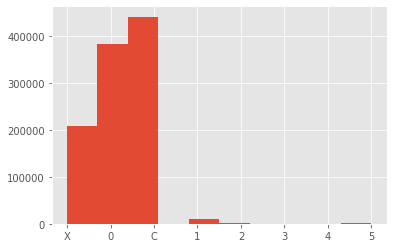

In [14]:
plt.hist(banco_credit_record["STATUS"])
plt.show()

In [15]:
#Cantidad de registros por estado
print("Cantidad de registros por estado:")
banco_credit_record["STATUS"].value_counts()

Cantidad de registros por estado:


C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

Descripción de las categorías de la variable STATUS

0: 1-29 días de atraso

1: 30-59 días de atraso

2: 60-89 días de atraso

3: 90-119 días de atraso

4: 120-149 días de atraso

5: Deudas atrasadas o incobrables, canceladas por más de 150 días

C: cancelado ese mes

X: Sin préstamo en el mes



**Dataset con información personal de los solicitantes**

In [16]:
banco_appli_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [17]:
banco_appli_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Se buscan registros duplicados y nulos.

In [18]:
print(f"Cantidad de registros duplicados: {banco_appli_record.duplicated().sum()}")

Cantidad de registros duplicados: 0


In [19]:
print(f"Cantidad de registros nulos:\n\n{banco_appli_record.isnull().sum()}")

Cantidad de registros nulos:

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


Exploración de caracteres especiales por cada una de las variables

In [20]:
lista_banco=[]
for i in banco_appli_record.columns[1:]:
  lista_banco.append({i:list(banco_appli_record[i].value_counts().index)})
display([lista_banco])

[[{'CODE_GENDER': ['F', 'M']},
  {'FLAG_OWN_CAR': ['N', 'Y']},
  {'FLAG_OWN_REALTY': ['Y', 'N']},
  {'CNT_CHILDREN': [0, 1, 2, 3, 4, 5, 7, 9, 12, 6, 14, 19]},
  {'AMT_INCOME_TOTAL': [135000.0,
    157500.0,
    180000.0,
    112500.0,
    225000.0,
    202500.0,
    90000.0,
    270000.0,
    315000.0,
    247500.0,
    67500.0,
    360000.0,
    292500.0,
    126000.0,
    81000.0,
    121500.0,
    144000.0,
    450000.0,
    99000.0,
    171000.0,
    103500.0,
    337500.0,
    166500.0,
    405000.0,
    117000.0,
    76500.0,
    189000.0,
    216000.0,
    162000.0,
    382500.0,
    108000.0,
    148500.0,
    72000.0,
    193500.0,
    94500.0,
    130500.0,
    211500.0,
    153000.0,
    54000.0,
    540000.0,
    175500.0,
    85500.0,
    139500.0,
    234000.0,
    45000.0,
    252000.0,
    675000.0,
    63000.0,
    207000.0,
    184500.0,
    261000.0,
    427500.0,
    238500.0,
    58500.0,
    243000.0,
    256500.0,
    198000.0,
    220500.0,
    49500.0,
    3060

Se analiza si en la variable DAYS_BIRTH hay presencia de datos atípicos o extraños

In [21]:
print(f" Edad máxima: {round((banco_appli_record['DAYS_BIRTH'].min())*-1/365,0)}")
print(f" Edad mínima: {round((banco_appli_record['DAYS_BIRTH'].max())*-1/365,0)}")

 Edad máxima: 69.0
 Edad mínima: 21.0


Se analiza el balance de las categorías en cada variable

In [22]:
for i in banco_appli_record.columns[1:]:
  print(f"{i}\n")
  print(f"{banco_appli_record[i].value_counts()}\n")

CODE_GENDER

F    294440
M    144117
Name: CODE_GENDER, dtype: int64

FLAG_OWN_CAR

N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_REALTY

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64

CNT_CHILDREN

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

AMT_INCOME_TOTAL

135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64

NAME_INCOME_TYPE

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

NAME_EDUCATION_TYPE

Secondary / secondary special    301821
Higher education                 1175

De lo anterior, se observa que no hay presencia de caracteres o datos especiales 

Para la columna "FLAG_MOBILE", se evidencia que todos los datos son "1", por lo tanto se decide no trabajar con ella
 
Se identifica que la columna de "OCCUPATION_TYPE" tiene datos NaN

Respecto a los datos categóricos se observa un desbalanceo pero no se considera relevante

In [23]:
del banco_appli_record["FLAG_MOBIL"]
banco_appli_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 15  OCCUPATION_TYPE  

**Datos númericos** (int,float)

In [43]:
banco_credit_num = banco_appli_record.select_dtypes(include = ["int","float"]).columns.tolist()
#banco_credit_num.remove('ID')
banco_appli_record[banco_credit_num].describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.000000,1.000000,1.000000,20.000000


**Datos categóricos** (objeto)

In [25]:
banco_credit_obj = banco_appli_record.select_dtypes(include = ["object"]).columns.tolist()
banco_appli_record[banco_credit_obj].describe()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


Se tratan los datos faltantes para la variable "OCCUPATION_TYPE"

In [26]:
#####Se imputan los registros nulos de la columna "OCCUPATION_TYPE" con la moda
banco_appli_record['OCCUPATION_TYPE'].fillna(stats.mode(banco_appli_record['OCCUPATION_TYPE'])[0][0], inplace=True)
banco_appli_record[banco_credit_obj].head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
2,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
4,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff


In [27]:
banco_appli_record[banco_credit_obj].describe()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


**Conclusión:** luego de probar con tres métodos diferentes (creación nueva clase, imputación por la moda y eliminación de la columna) y realizando pruebas con el modelo de "regresión logística", se observó que los mejores resultados se obtuvieron con la imputación de la moda. Además se consideró como regla de negocio que la ocupación es un factor relevante para la clasificación.

**Procesamiento para obtener variable de salida**

En la columna STATUS del dataset banco_credit_record, se asignará  “1” para los clientes con una deuda superior a los 60 días (cliente no apto) y “0” en cualquier otro caso (cliente apto)

In [28]:
banco_credit_record['STATUS'] = np.where((banco_credit_record['STATUS'] == '2') | (banco_credit_record['STATUS'] == '3' )| (banco_credit_record['STATUS'] == '4' )| (banco_credit_record['STATUS'] == '5'), 1, 0)
banco_credit_record 

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


Se convierte el ID a índice y se valida si en algún mes el usuario tiene una deuda superior a 60 días y se categoriza como cliente no apto

In [29]:
banco_credit_record_pivote = banco_credit_record.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS') #ID's SE CONVIERTEN EN INDICES
banco_credit_record_pivote['RESULTADO'] = banco_credit_record_pivote.sum(axis="columns") 
banco_credit_record_pivote['RESULTADO'] = np.where((banco_credit_record_pivote['RESULTADO'] > 0 ),1,0 ) #1 no apto, 0 apto
banco_credit_record_pivote

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-8,-7,-6,-5,-4,-3,-2,-1,0,RESULTADO
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5001715,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Se unen los 2 datasets por medio del ID

In [30]:
banco_unido= pd.merge(banco_appli_record, banco_credit_record_pivote["RESULTADO"], on='ID', how='inner')
banco_unido.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,RESULTADO
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0


In [31]:
banco_unido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  OCCUPATION_TYPE      25134 non-null 

Se observa que la cantidad de registros disminuye debido a que solo 36.457 de estos están relacionados por el ID 

In [32]:
banco_credit_record['STATUS'] = np.where((banco_credit_record['STATUS'] == '2') | (banco_credit_record['STATUS'] == '3' )| (banco_credit_record['STATUS'] == '4' )| (banco_credit_record['STATUS'] == '5'), 1, 0)
banco_credit_record 

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [33]:
banco_unido["RESULTADO"].value_counts()

0    35841
1      616
Name: RESULTADO, dtype: int64

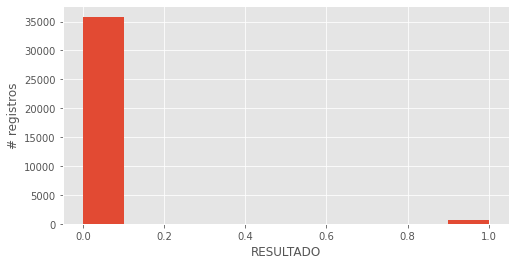

In [34]:
plt.figure(figsize=(8,4))
plt.hist(banco_unido["RESULTADO"])
plt.ylabel('# registros')
plt.xlabel('RESULTADO')
plt.show()

De los anteriores datos, se observa el desbalanceo de la variable de salida

Se elimina la variable ID, ya que no es relevante para el modelo y se crean variables dummies de las variables categóricas

In [35]:
del banco_unido["ID"]
banco_unido_codi = pd.get_dummies(banco_unido, drop_first=1)
banco_unido_codi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 46 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36457 non-null  int64  
 1   AMT_INCOME_TOTAL                                   36457 non-null  float64
 2   DAYS_BIRTH                                         36457 non-null  int64  
 3   DAYS_EMPLOYED                                      36457 non-null  int64  
 4   FLAG_WORK_PHONE                                    36457 non-null  int64  
 5   FLAG_PHONE                                         36457 non-null  int64  
 6   FLAG_EMAIL                                         36457 non-null  int64  
 7   CNT_FAM_MEMBERS                                    36457 non-null  float64
 8   RESULTADO                                          36457 non-null  int64  
 9   CODE_G

**Matriz de correlación**

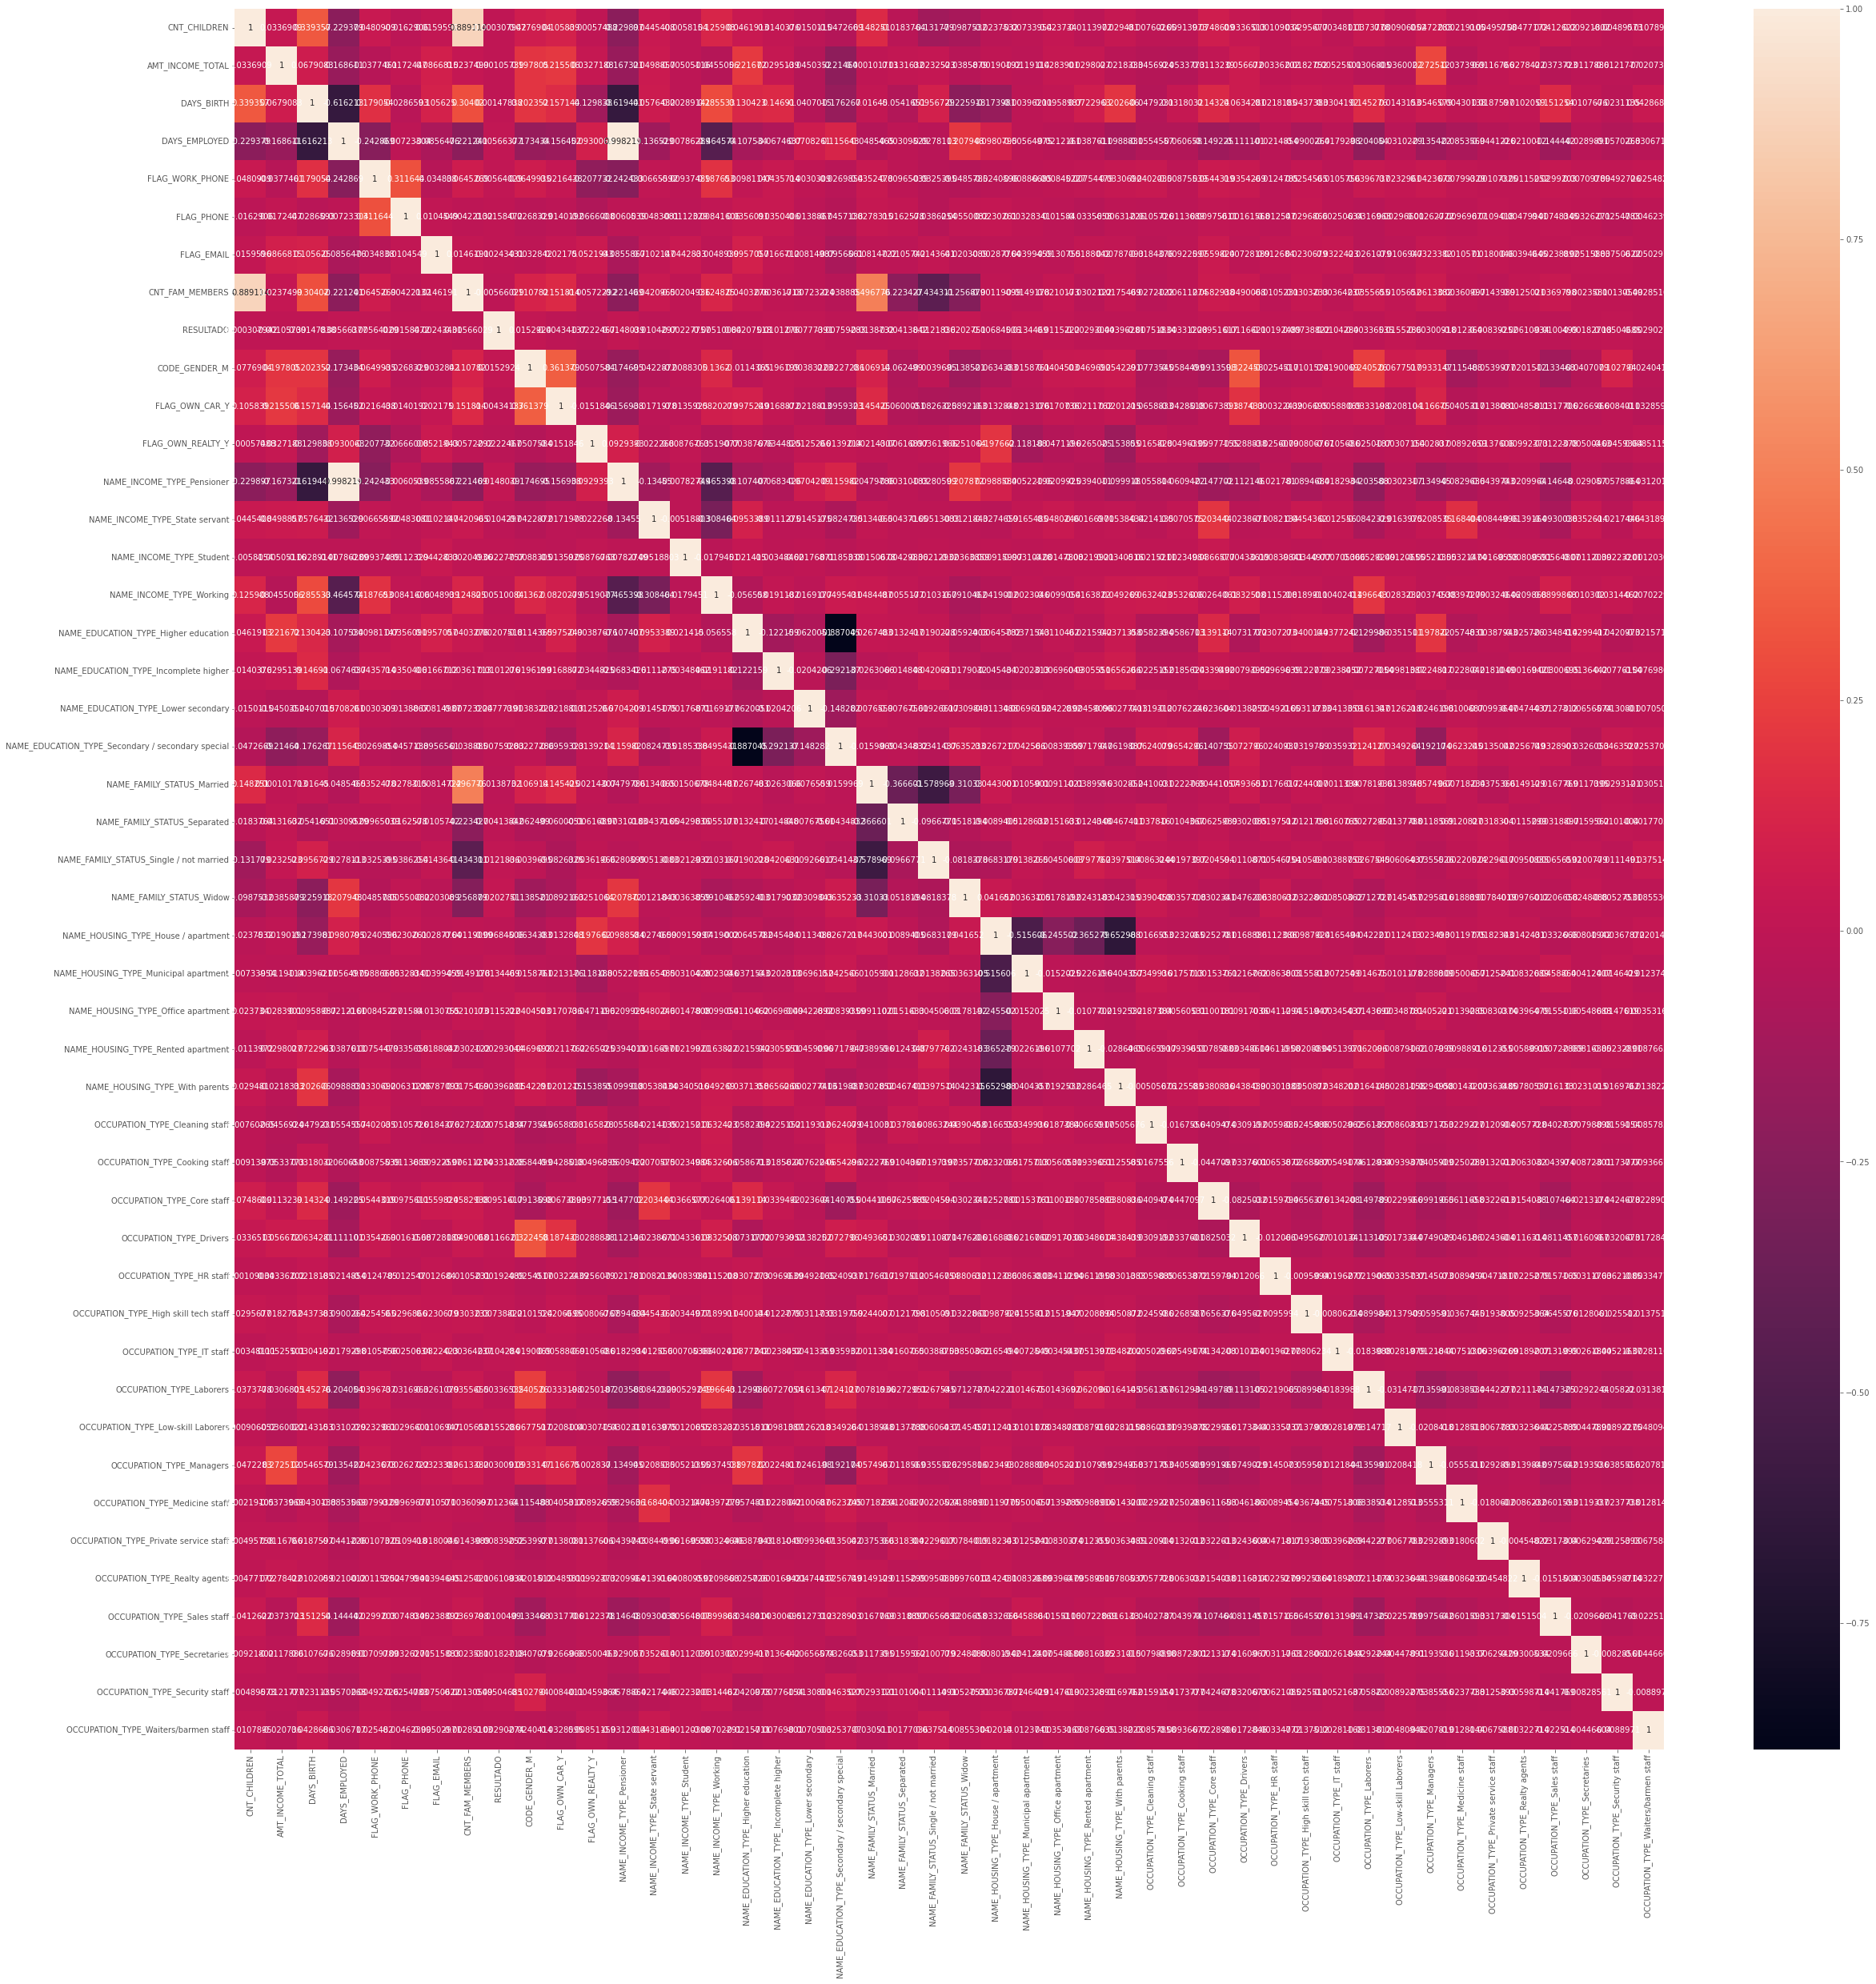

In [36]:
matriz_Correlacion_banco = banco_unido_codi.corr()

plt.figure(figsize=(40,40))

ax = sns.heatmap(matriz_Correlacion_banco, annot=True, fmt='g', xticklabels = banco_unido_codi.columns, yticklabels = banco_unido_codi.columns)
plt.show()

De la matríz de correlación, se observa que:

la variable de "CNT_CHILDREN" (cantidad de hijos) tiene una alta correlación con la variable "CNT_FAM_MEMBERS" (cantidad de miembros de la familia).

la variable de "DAYS_EMPLOYED" (Días empleo/desempleo) tiene una alta correlación con la variable "NAME_INCOME_TYPE_Pensioner" (Pensionados).

Debido a la alta correlación entre las variables "CNT_FAM_MEMBERS" y "CNT_CHILDREN" (0.88) y entre las variables "NAME_INCOME_TYPE_Pensioner" y "DAYS_EMPLOYED" (0.99) se decide eliminar las características "CNT_CHILDREN" y "NAME_INCOME_TYPE_Pensioner".


In [39]:
del banco_unido_codi["CNT_CHILDREN"]
del banco_unido_codi["NAME_INCOME_TYPE_Pensioner"]

**Análisis de entropía**

se realiza el análisis de la entropía relativa

In [63]:
caracteristicas_entropia = ["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS"]
features = banco_unido_codi[caracteristicas_entropia]

In [64]:
MM = MinMaxScaler()
features_normalizado = MM.fit_transform(features)
features_normalizado = pd.DataFrame(features_normalizado, columns = features.columns)

In [65]:
entropia_relativa = []

for _,n in enumerate(caracteristicas_entropia):
  for _,m in enumerate(caracteristicas_entropia):
    entropia_R = special.rel_entr(features_normalizado[n], features_normalizado[m])
    entropia_R = pd.DataFrame(entropia_R).replace(np.inf,0) # Reemplazamos los valores infinitos o inf por 0
    entropia_R = entropia_R.replace(-np.inf,0) # Reemplazamos los valores infinitos negativos o -inf por 0
    suma_entropia_R = entropia_R.sum()/features_normalizado.shape[0]
    entropia_relativa.append(suma_entropia_R)

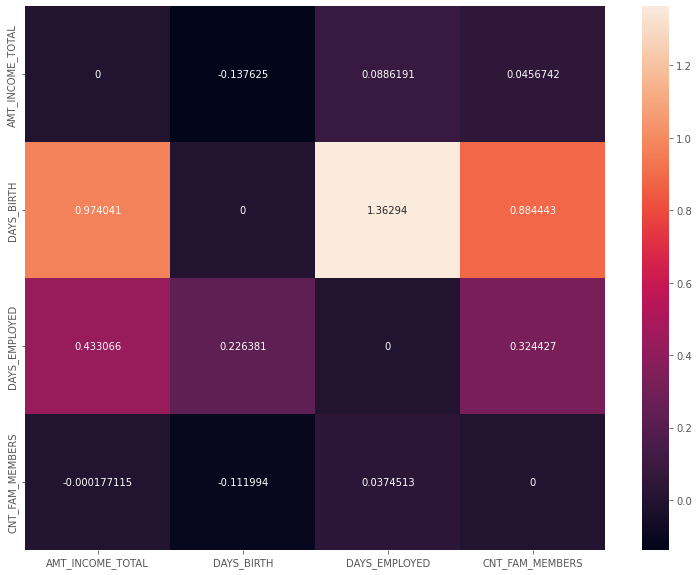

In [66]:
entropia_relativa = np.asarray(entropia_relativa)
entropia_relativa = entropia_relativa.reshape(features_normalizado.shape[1],features_normalizado.shape[1])
entropia_relativa = pd.DataFrame(entropia_relativa, index = caracteristicas_entropia, columns = caracteristicas_entropia)

plt.figure(figsize=(13,10))
ax = sns.heatmap(entropia_relativa, annot=True, fmt='g', xticklabels = caracteristicas_entropia, yticklabels = caracteristicas_entropia)
plt.show()

In [67]:
pos = np.where((entropia_relativa >= -0.05) & (entropia_relativa.values <= 0.05))
pos = np.asarray(pos) # Se aplica la transpuesta de la matriz de posiciones
pos = pos.T # Se convierte en una lista de valores
pos = pd.DataFrame(pos)
contador = 0

for _,n in enumerate(caracteristicas_entropia):
    pos = pos.replace(contador,n)
    contador = contador + 1

rel_caracteristicas = pd.DataFrame(pos.values, index = None, columns = ['Característica de referencia', 'Caracteristica auxiliar']) # Importante colocar pos.values para evitar que salga valores NaN
display(rel_caracteristicas)

,Característica de referencia,Caracteristica auxiliar
0,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL
1,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS
2,DAYS_BIRTH,DAYS_BIRTH
3,DAYS_EMPLOYED,DAYS_EMPLOYED
4,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL
5,CNT_FAM_MEMBERS,DAYS_EMPLOYED
6,CNT_FAM_MEMBERS,CNT_FAM_MEMBERS


In [69]:
rel_caracteristicas_diff = rel_caracteristicas[rel_caracteristicas["Característica de referencia"] != rel_caracteristicas["Caracteristica auxiliar"]]
rel_caracteristicas_diff

,Característica de referencia,Caracteristica auxiliar
1,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS
4,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL
5,CNT_FAM_MEMBERS,DAYS_EMPLOYED


De lo anterior se puede observar que las variables "AMT_INCOME_TOTAL" y "CNT_FAM_MEMBERS" son similares ya que la relación de la entropía entre estas características es recíproca.

**Eliminación datos atípicos**

Identificación y eliminación con el método LOF (Local Outlier Factor)

In [37]:
LOF_banco = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 0.05, metric = 'euclidean') 
filtrado_banco = LOF_banco.fit_predict(banco_unido_codi) # Se realiza la predicción de los datos atípicos
NOF_banco = LOF_banco.negative_outlier_factor_ 

radio_outlier_banco = (NOF_banco.max() - NOF_banco)/(NOF_banco.max() - NOF_banco.min()) # radio de detección de datos atípicos
ground_truth_banco = np.ones(len(banco_unido_codi), dtype = int) 

n_errors_banco = (filtrado_banco != ground_truth_banco).sum() # número de datos atípicos

print("Detección: ", filtrado_banco)
print("Factores atípicos negativos: ", NOF_banco)
print("Número de muestras o filas con datos atípicos: ", n_errors_banco)

Detección:  [ 1  1 -1 ...  1  1  1]
Factores atípicos negativos:  [-2.02993469e+00 -2.02993469e+00 -2.99943345e+12 ... -9.88284271e-01
 -1.00000000e+00 -1.28495887e+00]
Número de muestras o filas con datos atípicos:  1820


Se eliminan los 1820 datos atípicos encontrados en el paso anterior

In [38]:
pos_banco = np.where(filtrado_banco == ground_truth_banco) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos_banco = np.asarray(pos_banco)
pos_banco = np.hstack(pos_banco)

datos_sin_outliers_LOF_banco = banco_unido_codi.loc[pos_banco, :]
print(f"Número de muestras sin outliers: {datos_sin_outliers_LOF_banco.shape[0]}\n")
display(datos_sin_outliers_LOF_banco)
print(f"\nTamaño de base de datos original: {banco_unido_codi.shape}")
print(f"Tamaño de base de datos sin outliers: {datos_sin_outliers_LOF_banco.shape}") 

Número de muestras sin outliers: 34637



,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,RESULTADO,CODE_GENDER_M,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0,427500.0,-12005,-4542,1,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,427500.0,-12005,-4542,1,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,315000.0,-17348,-2420,0,0,0,2.0,1,1,...,0,0,1,0,0,0,0,0,0,0
36453,0,157500.0,-12387,-1325,0,1,1,2.0,1,0,...,0,0,0,1,0,0,0,0,0,0
36454,0,157500.0,-12387,-1325,0,1,1,2.0,1,0,...,0,0,0,1,0,0,0,0,0,0
36455,0,283500.0,-17958,-655,0,0,0,2.0,1,0,...,0,0,0,0,0,0,1,0,0,0



Tamaño de base de datos original: (36457, 46)
Tamaño de base de datos sin outliers: (34637, 46)


##Pruebas con Regresión logística con datos desbalanceados


Se reemplazan los valores de la variable de salida por:
0 = GOOD
1 = BAD

In [71]:
datos_sin_outliers_LOF_banco["RESULTADO"].replace(0,'APTO', inplace=True)
datos_sin_outliers_LOF_banco["RESULTADO"].replace(1,'NO_APTO', inplace=True)

❌❌❌❌❌❌**Se implementa el método Random Over Sampler como método de balanceo**: ❌❌❌❌❌❌❌❌

In [73]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(datos_sin_outliers_LOF_banco.columns)
banco_columns.remove('RESULTADO')

X = datos_sin_outliers_LOF_banco[banco_columns]
y = datos_sin_outliers_LOF_banco['RESULTADO']

In [ ]:
#ros = RandomOverSampler(sampling_strategy='auto', random_state=123)
#X_R, y_R = ros.fit_resample(X, y)

In [ ]:
#print('Resampled dataset shape %s' % Counter(y_R))



Resampled dataset shape Counter({'GOOD': 34055, 'BAD': 34055})


In [74]:
banco_clientes_ROS = pd.concat([X, y], axis=1)
banco_clientes_ROS

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_M,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,RESULTADO
0,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,GOOD
1,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,GOOD
3,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,GOOD
4,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,GOOD
5,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,315000.0,-17348,-2420,0,0,0,2.0,1,1,...,0,1,0,0,0,0,0,0,0,BAD
36453,0,157500.0,-12387,-1325,0,1,1,2.0,0,0,...,0,0,1,0,0,0,0,0,0,BAD
36454,0,157500.0,-12387,-1325,0,1,1,2.0,0,0,...,0,0,1,0,0,0,0,0,0,BAD
36455,0,283500.0,-17958,-655,0,0,0,2.0,0,0,...,0,0,0,0,0,1,0,0,0,BAD


In [ ]:
#banco_clientes_ROS = pd.concat([X_R, y_R], axis=1)
#banco_clientes_ROS

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_M,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,RESULTADO
0,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,GOOD
1,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,GOOD
2,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,GOOD
3,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,GOOD
4,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68105,0,202500.0,-15160,-3974,0,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,BAD
68106,0,157500.0,-11490,-3116,1,1,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,BAD
68107,0,56250.0,-23773,365243,0,1,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,BAD
68108,0,207000.0,-14740,-6723,0,1,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,BAD


❌❌❌❌❌**Se elige una muestra aleatoria de 2.000 registros para estabilizar los modelos**❌❌❌❌❌





In [82]:
n = 10000
muestra_banco = banco_clientes_ROS.sample(n=n,random_state=1234)
muestra_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26445 to 1503
Data columns (total 46 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       10000 non-null  int64  
 1   AMT_INCOME_TOTAL                                   10000 non-null  float64
 2   DAYS_BIRTH                                         10000 non-null  int64  
 3   DAYS_EMPLOYED                                      10000 non-null  int64  
 4   FLAG_WORK_PHONE                                    10000 non-null  int64  
 5   FLAG_PHONE                                         10000 non-null  int64  
 6   FLAG_EMAIL                                         10000 non-null  int64  
 7   CNT_FAM_MEMBERS                                    10000 non-null  float64
 8   CODE_GENDER_M                                      10000 non-null  uint8  
 9   FLA

### **Validación del modelo Regresión Logística**

In [83]:
#Se remueve la columna de 'salida' => "RESULTADO"
banco_columns = list(muestra_banco.columns)
banco_columns.remove('RESULTADO')

X = muestra_banco[banco_columns]
y = muestra_banco['RESULTADO']


#### Dividir el conjunto de datos

En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 


In [84]:
#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [85]:
scaler = MinMaxScaler()
num_vars = banco_credit_num[1:]
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [86]:
X_Completo = X
y_Completo = y

#### Búsqueda de hiperparámetros

In [87]:
logisticReg = LogisticRegression()

parameters = {'C': [0.001, 0.1, 1, 10, 100],
              'multi_class': ['ovr', 'auto', 'multinomial'], 
              'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
              'class_weight': ['balanced', None]
              } 

grid_reg_log = GridSearchCV(logisticReg, param_grid=parameters, cv=10, verbose=3)

grid_reg_log_result = grid_reg_log.fit(X_Completo,y_Completo) 

grid_reg_log_result

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV 1/10] END C=0.001, class_weight=balanced, multi_class=ovr, solver=liblinear;, score=0.579 total time=   0.2s
[CV 2/10] END C=0.001, class_weight=balanced, multi_class=ovr, solver=liblinear;, score=0.618 total time=   0.3s
[CV 3/10] END C=0.001, class_weight=balanced, multi_class=ovr, solver=liblinear;, score=0.565 total time=   0.3s
[CV 4/10] END C=0.001, class_weight=balanced, multi_class=ovr, solver=liblinear;, score=0.580 total time=   0.3s
[CV 5/10] END C=0.001, class_weight=balanced, multi_class=ovr, solver=liblinear;, score=0.544 total time=   0.4s
[CV 6/10] END C=0.001, class_weight=balanced, multi_class=ovr, solver=liblinear;, score=0.583 total time=   0.3s
[CV 7/10] END C=0.001, class_weight=balanced, multi_class=ovr, solver=liblinear;, score=0.541 total time=   0.3s
[CV 8/10] END C=0.001, class_weight=balanced, multi_class=ovr, solver=liblinear;, score=0.599 total time=   0.3s
[CV 9/10] END C=0.001, class_we

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'multi_class': ['ovr', 'auto', 'multinomial'],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg',
                                    'sag']},
             verbose=3)

#### Creación del modelo

In [88]:
best_params_reg_log = grid_reg_log_result.best_params_
print('Best Parameters : ', best_params_reg_log)

Best Parameters :  {'C': 100, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'newton-cg'}


❌❌❌❌Se crea el modelo con la base de datos balanceada con datos sintéticos

In [89]:
X = banco_clientes_ROS[banco_columns]
y = banco_clientes_ROS['RESULTADO']

In [90]:
#Datos de entrenamiento y de prueba base de datos completa
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [91]:
scaler = MinMaxScaler()
num_vars = banco_credit_num[1:]
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

Se crea el modelo con los mejores parámetros obtenidos del método anterior ('C': 1, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg')

In [92]:
model_reg_logistica = LogisticRegression(
    C = best_params_reg_log["C"],
    class_weight = best_params_reg_log["class_weight"], 
    multi_class = best_params_reg_log["multi_class"], 
    solver = best_params_reg_log["solver"],
    random_state = 0)

model_reg_logistica.fit(X_train, y_train)

LogisticRegression(C=100, multi_class='multinomial', random_state=0,
                   solver='newton-cg')

#### Accuracy

In [93]:
y_1 = model_reg_logistica.predict(X_test)

In [94]:
print("===========Accuracy Logistic Regression ================")
print("multinomial - newton-cg:", metrics.accuracy_score(y_test, y_1))

===========Accuracy Logistic Regression ================
multinomial - newton-cg: 0.9821016166281755


#### Matriz de confusión

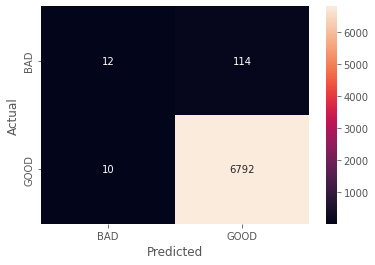

              precision    recall  f1-score   support

         BAD       0.55      0.10      0.16       126
        GOOD       0.98      1.00      0.99      6802

    accuracy                           0.98      6928
   macro avg       0.76      0.55      0.58      6928
weighted avg       0.98      0.98      0.98      6928



In [95]:
#Matriz de confusión

conf_mat = confusion_matrix(y_test, y_1)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=banco_clientes_ROS['RESULTADO'].sort_values().unique()
            , yticklabels=banco_clientes_ROS['RESULTADO'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_1, target_names=banco_clientes_ROS['RESULTADO'].sort_values().unique()))

#Matriz de confusion como porcentaje 0-100%

#### Receiver Operating Characteristic (ROC)

In [96]:
#Convertir y_test NO_APTO y APTO en 1 y 0

e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('BAD',1, inplace=True)
e_dataframe.replace('GOOD', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.52


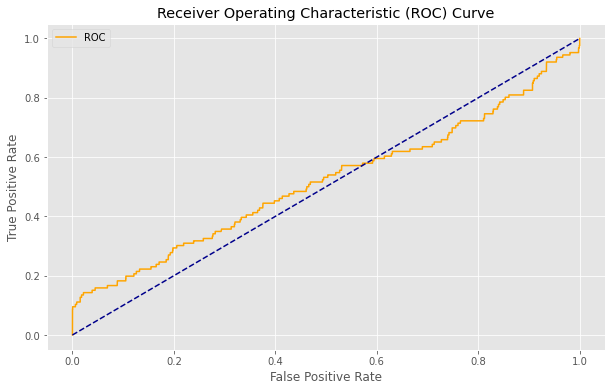

In [97]:
fig = plt.figure(figsize=(10,6))


probs = model_reg_logistica.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(arr, probs*(-1))
plot_roc_curve(fpr, tpr)

#Referencias


*   Credit Card Approval Prediction. (2021). https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv
*   The Complement Naive Bayes classifier described in Rennie et al. (2003). https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB
*   EDA & Vintage Analysis. (2021). https://www.kaggle.com/code/rikdifos/eda-vintage-analysis/notebook
*   CREDIT RISK: VINTAGE ANALYSIS. (2022). https://www.listendata.com/2019/09/credit-risk-vintage-analysis.html
*   Credit Card Approval Prediction Using ML. (2020). https://www.kaggle.com/code/rikdifos/credit-card-approval-prediction-using-ml/notebook
* The Potential of cohort Analysis for Vintage Analysis An Expliration. (2012) http://essay.utwente.nl/61383/1/MSc_M_Bosman.pdf

